In [2]:
# Import libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import Australian weather CSV
Weather = pd.read_csv('weatherAUS.csv')

In [4]:
Weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [4]:
len(WeatherFilt['Location'].str.match('NA').to_numpy().nonzero()[0])

NameError: name 'WeatherFilt' is not defined

In [5]:
# Check how many NAs are in columns - do we exclude features or observations??
#columns = ['MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am',
#           'WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
#           'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',
#           'RainToday','RainTomorrow'];

columns = Weather.columns;
total_length = len(Weather);
invaliddf = [];
for i in columns:
    if(Weather[i].dtype == 'float64'):
        invalid1 = len(np.isnan(Weather[i]).to_numpy().nonzero()[0]);
    if(Weather[i].dtype == object):
        invalid1 = len(Weather[i].str.match('NA').to_numpy().nonzero()[0])
    invalidpercentage = invalid1*100/total_length;
    invaliddf.append([i,invalidpercentage]);
invaliddf = pd.DataFrame(invaliddf,columns=['Attribute','Invalid percentage']);
invaliddf = invaliddf.set_index('Attribute')
invaliddf

,Invalid percentage
Attribute,
Date,0.000000
Location,0.000000
MinTemp,0.447983
MaxTemp,0.226453
Rainfall,0.988797
Evaporation,42.789026
Sunshine,47.692924
WindGustDir,6.561504
WindGustSpeed,6.519308


In [6]:
# Remove all observations that have NaNs - cleanest dataset possible but maybe loses too much?
# Only 40% of data left
WeatherFilt = Weather.copy();

columns = WeatherFilt.columns;
initial_length = len(WeatherFilt);
WeatherFilt = WeatherFilt.dropna();
final_length = len(WeatherFilt);
perc_dropped = (initial_length-final_length)*100/initial_length; 
print(f'Clean dataframe has lost {perc_dropped:.2f} %')

Clean dataframe has lost 60.32 %


In [7]:
# One-hot encoding for the categorical variables

# Location
Locations = WeatherFilt['Location'].unique()
Locations_OH = np.zeros((len(WeatherFilt),len(Locations)));
for i,loc in enumerate(Locations):
    idx = WeatherFilt['Location'].str.match(loc).to_numpy().nonzero()[0];
    Locations_OH[idx,i] = 1;

# Wind gust direction
WindDir1 = WeatherFilt['WindGustDir'].unique();
WindGustDir_OH = np.zeros((len(WeatherFilt),len(WindDir1)));
for i,wind in enumerate(WindDir1):
    idx = WeatherFilt['WindGustDir'].str.match(wind).to_numpy().nonzero()[0];
    WindGustDir_OH[idx,i] = 1;

# Wind direction 9am
WindDir2 = WeatherFilt['WindDir9am'].unique();
WindDir9am_OH = np.zeros((len(WeatherFilt),len(WindDir2)));
for i,wind in enumerate(WindDir2):
    idx = WeatherFilt['WindDir9am'].str.match(wind).to_numpy().nonzero()[0];
    WindDir9am_OH[idx,i] = 1;

# Wind direction 3pm
WindDir3 = WeatherFilt['WindDir3pm'].unique();
WindDir3pm_OH = np.zeros((len(WeatherFilt),len(WindDir3)));
for i,wind in enumerate(WindDir3):
    idx = WeatherFilt['WindDir3pm'].str.match(wind).to_numpy().nonzero()[0];
    WindDir3pm_OH[idx,i] = 1;

# Rain today/tomorrow
RainToday = pd.Series(np.where(WeatherFilt.RainToday.values == 'Yes', 1, 0),WeatherFilt.index);
RainTomorrow = pd.Series(np.where(WeatherFilt.RainTomorrow.values == 'Yes', 1, 0),WeatherFilt.index);

np.shape(RainToday)

(56420,)

In [9]:
type(RainToday)

pandas.core.series.Series

In [8]:
# Inputs will now be:
# <Location>
# Min temp, max temp, rainfall, evaporation, sunshine
# <Wind gust direction>
# Wind gust speed
# <Wind direction 9am, wind direction 3pm>
# Wind speed 9am, wind speed 3pm, humidity 9am, humidity 3pm
# Pressure 9am, pressure 3pm, cloud 9am, cloud 3pm, temp 9am, temp 3pm
# Rain today

num_features = len(Locations) + len(WindDir1) + len(WindDir2) + len(WindDir3) + 17;
inputs = np.zeros((len(WeatherFilt),num_features));
for i in range(len(WeatherFilt)):
    idx = 0;
    for k in range(len(Locations)):
        inputs[i,idx] = Locations_OH[i,k];
        idx = idx+1;
        
    inputs[i,idx] = WeatherFilt["MinTemp"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["MaxTemp"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Rainfall"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Evaporation"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Sunshine"].values[i]; idx = idx+1;
    
    for k in range(len(WindDir1)):
        inputs[i,idx] = WindGustDir_OH[i,k];
        idx = idx+1;
        
    inputs[i,idx] = WeatherFilt["WindGustSpeed"].values[i]; idx = idx+1;
        
    for k in range(len(WindDir2)):
        inputs[i,idx] = WindDir9am_OH[i,k];
        idx = idx+1;
        
    for k in range(len(WindDir3)):
        inputs[i,idx] = WindDir9am_OH[i,k];
        idx = idx+1;
        
    inputs[i,idx] = WeatherFilt["WindSpeed9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["WindSpeed3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Humidity9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Humidity3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Pressure9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Pressure3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Cloud9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Cloud3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Temp9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Temp3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = RainToday.values[i]; idx = idx+1;
    
X = inputs;
y = RainTomorrow.values;

In [190]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42);

# Scaling
scaler = StandardScaler();
scaler.fit(X_train);
X_train = scaler.transform(X_train);
X_test = scaler.transform(X_test);

# Define classifier
clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(80,40),
                    random_state=1, max_iter=500, early_stopping=True, validation_fraction=0.15,
                   verbose=True);

clf.fit(X_train,y_train);

Iteration 1, loss = 0.39393410
Validation score: 0.845001
Iteration 2, loss = 0.32949539
Validation score: 0.850644
Iteration 3, loss = 0.31606463
Validation score: 0.854699
Iteration 4, loss = 0.30836651
Validation score: 0.857873
Iteration 5, loss = 0.30184219
Validation score: 0.855581
Iteration 6, loss = 0.29631108
Validation score: 0.857168
Iteration 7, loss = 0.29229929
Validation score: 0.854876
Iteration 8, loss = 0.28758707
Validation score: 0.856286
Iteration 9, loss = 0.28317514
Validation score: 0.856286
Iteration 10, loss = 0.27868068
Validation score: 0.856110
Iteration 11, loss = 0.27492736
Validation score: 0.861047
Iteration 12, loss = 0.27155029
Validation score: 0.861047
Iteration 13, loss = 0.26789902
Validation score: 0.854699
Iteration 14, loss = 0.26500554
Validation score: 0.855405
Iteration 15, loss = 0.26200309
Validation score: 0.855052
Iteration 16, loss = 0.25868810
Validation score: 0.854523
Iteration 17, loss = 0.25558049
Validation score: 0.857873
Iterat

In [188]:
y_pred = clf.predict(X_test);
total_pred_rain = len(y_pred.nonzero()[0]);
total_rain = len(y_test.nonzero()[0]);
idx1 = y_pred.nonzero()[0];
idx2 = y_test.nonzero()[0];
correct_pred_rain = len(np.intersect1d(idx1,idx2));

Precision = correct_pred_rain/total_pred_rain;
Recall = correct_pred_rain/total_rain;

print(f"P = {Precision:.2f} \t R = {Recall:.2f}")

P = 0.73 	 R = 0.58


In [189]:
2*Precision*Recall/(Precision+Recall)

0.6472894416655401

Feature ranking:
1. feature 83 Humidity3pm (0.1028189027157437)
2. feature 30 Sunshine (0.08229946207007269)
3. feature 87 Cloud3pm (0.06764850313838486)
4. feature 90 RainToday (0.04386746910944629)
5. feature 86 Cloud9am (0.04345849325855733)
6. feature 85 Pressure3pm (0.04330181831891557)
7. feature 47 WindGustSpeed (0.04168639929710834)
8. feature 84 Pressure9am (0.04076322086493355)
9. feature 82 Humidity9am (0.03628144430152299)
10. feature 89 Temp3pm (0.032651516436451526)
11. feature 26 MinTemp (0.03093994907875537)
12. feature 88 Temp9am (0.02980345984349292)
13. feature 27 MaxTemp (0.029609771522387876)
14. feature 81 WindSpeed3pm (0.02835049028233909)
15. feature 80 WindSpeed9am (0.027665874037731308)
16. feature 29 Evaporation (0.02764893268901209)
17. feature 28 Rainfall (0.026315382569362427)
18. feature 22 Loc: Perth (0.008214548860307943)
19. feature 32 WindGustDir (0.007688924506219388)
20. feature 35 WindGustDir (0.00723640815924832)
21. feature 41 WindGustDir (0.0068

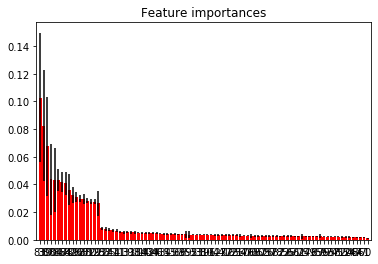

In [178]:
# Use extra trees to determine feature importance
from sklearn.ensemble import ExtraTreesClassifier

# Feature name to numbers
feat_name = [];
for k in range(len(Locations)):
    feat_name.append(f'Loc: {Locations[k]}');
feat_name.append('MinTemp')
feat_name.append('MaxTemp')
feat_name.append('Rainfall')
feat_name.append('Evaporation')
feat_name.append('Sunshine')

for k in range(len(WindDir1)):
    feat_name.append('WindGustDir');
feat_name.append('WindGustSpeed')

for k in range(len(WindDir2)):
    feat_name.append('WindDir9am');
for k in range(len(WindDir3)):
    feat_name.append('WindDir3pm');

feat_name.append('WindSpeed9am');
feat_name.append('WindSpeed3pm');
feat_name.append('Humidity9am');
feat_name.append('Humidity3pm');
feat_name.append('Pressure9am');
feat_name.append('Pressure3pm');
feat_name.append('Cloud9am');
feat_name.append('Cloud3pm');
feat_name.append('Temp9am');
feat_name.append('Temp3pm');
feat_name.append('RainToday');

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f+1}. feature {indices[f]} {feat_name[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [175]:
len(WindDir1)

16

In [9]:
# Based on feature importance study, make some changes:
# Inputs will now be:
# Min temp, max temp, rainfall, evaporation, sunshine
# Wind gust speed
# Wind speed 9am, wind speed 3pm, humidity 9am, humidity 3pm
# Pressure 9am, pressure 3pm, cloud 9am, cloud 3pm, temp 9am, temp 3pm
# Rain today

num_features = 17;
inputs = np.zeros((len(WeatherFilt),num_features));
for i in range(len(WeatherFilt)):
    idx = 0;
        
    inputs[i,idx] = WeatherFilt["MinTemp"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["MaxTemp"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Rainfall"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Evaporation"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Sunshine"].values[i]; idx = idx+1;
        
    inputs[i,idx] = WeatherFilt["WindGustSpeed"].values[i]; idx = idx+1;
        
    inputs[i,idx] = WeatherFilt["WindSpeed9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["WindSpeed3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Humidity9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Humidity3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Pressure9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Pressure3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Cloud9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Cloud3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Temp9am"].values[i]; idx = idx+1;
    inputs[i,idx] = WeatherFilt["Temp3pm"].values[i]; idx = idx+1;
    inputs[i,idx] = RainToday.values[i]; idx = idx+1;
    
X = inputs;
y = RainTomorrow.values;
print(idx)

17


In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42);

# Scaling
scaler = StandardScaler();
scaler.fit(X_train);
X_train = scaler.transform(X_train);
X_test = scaler.transform(X_test);

# Define classifier
clf = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(50,50),
                    random_state=1, max_iter=500, early_stopping=True, validation_fraction=0.20,
                   verbose=True);

clf.fit(X_train,y_train);

Iteration 1, loss = 0.37611055
Validation score: 0.850133
Iteration 2, loss = 0.33579344
Validation score: 0.855007
Iteration 3, loss = 0.33207339
Validation score: 0.854674
Iteration 4, loss = 0.33046822
Validation score: 0.855671
Iteration 5, loss = 0.32807494
Validation score: 0.856225
Iteration 6, loss = 0.32679195
Validation score: 0.856890
Iteration 7, loss = 0.32530801
Validation score: 0.855007
Iteration 8, loss = 0.32396891
Validation score: 0.857444
Iteration 9, loss = 0.32268238
Validation score: 0.855893
Iteration 10, loss = 0.32167692
Validation score: 0.858883
Iteration 11, loss = 0.32008651
Validation score: 0.856336
Iteration 12, loss = 0.31964984
Validation score: 0.854896
Iteration 13, loss = 0.31854656
Validation score: 0.857554
Iteration 14, loss = 0.31779169
Validation score: 0.857554
Iteration 15, loss = 0.31683866
Validation score: 0.860323
Iteration 16, loss = 0.31594179
Validation score: 0.858662
Iteration 17, loss = 0.31485282
Validation score: 0.861985
Iterat

0.00 	 P = 0.22 	 R = 1.00 	 F = 0.361
0.05 	 P = 0.36 	 R = 0.96 	 F = 0.520
0.10 	 P = 0.44 	 R = 0.92 	 F = 0.591
0.15 	 P = 0.50 	 R = 0.87 	 F = 0.631
0.20 	 P = 0.55 	 R = 0.82 	 F = 0.657
0.25 	 P = 0.59 	 R = 0.77 	 F = 0.671
0.30 	 P = 0.63 	 R = 0.73 	 F = 0.675
0.35 	 P = 0.66 	 R = 0.68 	 F = 0.673
0.40 	 P = 0.70 	 R = 0.63 	 F = 0.664
0.45 	 P = 0.73 	 R = 0.59 	 F = 0.653
0.50 	 P = 0.76 	 R = 0.55 	 F = 0.636
0.55 	 P = 0.79 	 R = 0.50 	 F = 0.612
0.60 	 P = 0.81 	 R = 0.45 	 F = 0.583
0.65 	 P = 0.84 	 R = 0.41 	 F = 0.551
0.70 	 P = 0.87 	 R = 0.36 	 F = 0.511
0.75 	 P = 0.89 	 R = 0.31 	 F = 0.465
0.80 	 P = 0.92 	 R = 0.26 	 F = 0.409
0.85 	 P = 0.94 	 R = 0.20 	 F = 0.335
0.90 	 P = 0.96 	 R = 0.13 	 F = 0.228
0.95 	 P = 0.98 	 R = 0.04 	 F = 0.084


(array([18199.,  5939.,  3558.,  2469.,  1929.,  1522.,  1266.,  1151.,
          955.,   883.,   836.,   785.,   714.,   672.,   678.,   663.,
          666.,   779.,   864.,   608.]),
 array([6.08437904e-04, 5.01075037e-02, 9.96065696e-02, 1.49105635e-01,
        1.98604701e-01, 2.48103767e-01, 2.97602833e-01, 3.47101899e-01,
        3.96600965e-01, 4.46100030e-01, 4.95599096e-01, 5.45098162e-01,
        5.94597228e-01, 6.44096294e-01, 6.93595360e-01, 7.43094425e-01,
        7.92593491e-01, 8.42092557e-01, 8.91591623e-01, 9.41090689e-01,
        9.90589755e-01]),
 <a list of 20 Patch objects>)

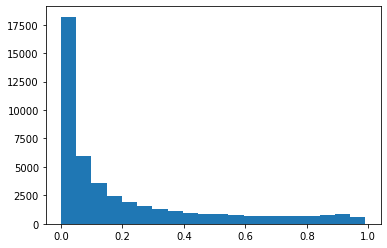

In [80]:
# Investigate different probability thresholds
y_proba = clf.predict_proba(X_train);
y_proba = y_proba[:,1]
for i in np.arange(0,1.0,0.05):
    y_proba2 = (y_proba>i)*1;
    total_pred_rain = len(y_proba2.nonzero()[0]);
    total_rain = len(y_train.nonzero()[0]);
    idx1 = y_proba2.nonzero()[0];
    idx2 = y_train.nonzero()[0];
    correct_pred_rain = len(np.intersect1d(idx1,idx2));
    if(total_pred_rain==0):
        Precision = 0;
    else:
        Precision = correct_pred_rain/total_pred_rain;
    Recall = correct_pred_rain/total_rain;
    if(Precision==0 or Recall==0):
        F=0;
    else:
        F = 2*Precision*Recall/(Precision+Recall);
    print(f"{i:.2f} \t P = {Precision:.2f} \t R = {Recall:.2f} \t F = {F:.3f}")
plt.hist(y_proba, bins=20)

(11284,)
P = 0.74 	 R = 0.54
[0 1]


(array([9473.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1811.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

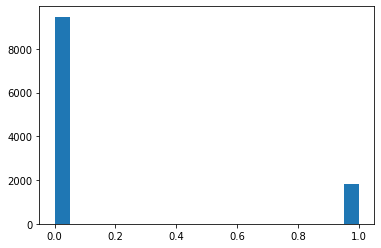

In [72]:
y_pred = clf.predict(X_test);
print(np.shape(y_pred))
total_pred_rain = len(y_pred.nonzero()[0]);
total_rain = len(y_test.nonzero()[0]);
idx1 = y_pred.nonzero()[0];
idx2 = y_test.nonzero()[0];
correct_pred_rain = len(np.intersect1d(idx1,idx2));

Precision = correct_pred_rain/total_pred_rain;
Recall = correct_pred_rain/total_rain;

print(f"P = {Precision:.2f} \t R = {Recall:.2f}")
print(np.unique(y_pred))
plt.hist(y_pred,bins=20)

In [19]:
2*Precision*Recall/(Precision+Recall)

0.6214049976426214

In [247]:
# Try with SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42);

# Scaling
scaler = StandardScaler();
scaler.fit(X_train);
X_train = scaler.transform(X_train);
X_test = scaler.transform(X_test);

# Define classifier
clf = SVC(C=1, kernel = 'rbf', gamma=2, verbose=True, random_state=1)

clf.fit(X_train,y_train);

[LibSVM]

In [248]:
y_pred = clf.predict(X_test);
total_pred_rain = len(y_pred.nonzero()[0]);
total_rain = len(y_test.nonzero()[0]);
idx1 = y_pred.nonzero()[0];
idx2 = y_test.nonzero()[0];
correct_pred_rain = len(np.intersect1d(idx1,idx2));

Precision = correct_pred_rain/total_pred_rain;
Recall = correct_pred_rain/total_rain;

print(f"P = {Precision:.2f} \t R = {Recall:.2f}")

P = 0.75 	 R = 0.03


In [229]:
2*Precision*Recall/(Precision+Recall)

0.6217964071856288

In [ ]:
# Try with GP classifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42);

# Scaling
scaler = StandardScaler();
scaler.fit(X_train);
X_train = scaler.transform(X_train);
X_test = scaler.transform(X_test);

# Define classifier
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=1).fit(X_train, y_train)
gpc.score(X, y)
gpc.predict_proba(X[:2,:])

In [74]:
# Try with logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42);

# Scaling
scaler = StandardScaler();
scaler.fit(X_train);
X_train = scaler.transform(X_train);
X_test = scaler.transform(X_test);

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test);
total_pred_rain = len(y_pred.nonzero()[0]);
total_rain = len(y_test.nonzero()[0]);
idx1 = y_pred.nonzero()[0];
idx2 = y_test.nonzero()[0];
correct_pred_rain = len(np.intersect1d(idx1,idx2));

Precision = correct_pred_rain/total_pred_rain;
Recall = correct_pred_rain/total_rain;

print(f"P = {Precision:.2f} \t R = {Recall:.2f}")

P = 0.74 	 R = 0.54


In [15]:
2*Precision*Recall/(Precision+Recall)

0.6225227325716949

0.00 	 P = 0.22 	 R = 1.00 	 F = 0.361
0.05 	 P = 0.32 	 R = 0.97 	 F = 0.487
0.10 	 P = 0.41 	 R = 0.92 	 F = 0.568
0.15 	 P = 0.48 	 R = 0.86 	 F = 0.613
0.20 	 P = 0.53 	 R = 0.81 	 F = 0.638
0.25 	 P = 0.57 	 R = 0.76 	 F = 0.648
0.30 	 P = 0.60 	 R = 0.70 	 F = 0.650
0.35 	 P = 0.64 	 R = 0.66 	 F = 0.648
0.40 	 P = 0.67 	 R = 0.62 	 F = 0.645
0.45 	 P = 0.70 	 R = 0.57 	 F = 0.631
0.50 	 P = 0.73 	 R = 0.54 	 F = 0.616
0.55 	 P = 0.76 	 R = 0.49 	 F = 0.597
0.60 	 P = 0.78 	 R = 0.45 	 F = 0.572
0.65 	 P = 0.81 	 R = 0.40 	 F = 0.539
0.70 	 P = 0.83 	 R = 0.36 	 F = 0.502
0.75 	 P = 0.87 	 R = 0.31 	 F = 0.455
0.80 	 P = 0.90 	 R = 0.26 	 F = 0.402
0.85 	 P = 0.92 	 R = 0.20 	 F = 0.331
0.90 	 P = 0.95 	 R = 0.14 	 F = 0.237
0.95 	 P = 0.96 	 R = 0.06 	 F = 0.113


(array([15767.,  7265.,  4115.,  2681.,  2088.,  1617.,  1333.,  1136.,
          971.,   838.,   846.,   737.,   751.,   711.,   740.,   676.,
          678.,   737.,   810.,   639.]),
 array([0.00183898, 0.05169055, 0.10154211, 0.15139367, 0.20124524,
        0.2510968 , 0.30094837, 0.35079993, 0.40065149, 0.45050306,
        0.50035462, 0.55020619, 0.60005775, 0.64990931, 0.69976088,
        0.74961244, 0.79946401, 0.84931557, 0.89916713, 0.9490187 ,
        0.99887026]),
 <a list of 20 Patch objects>)

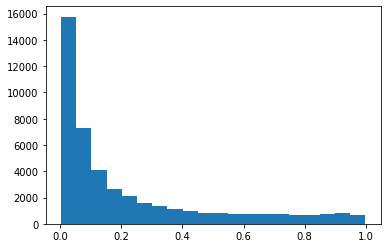

In [75]:
# Investigate different probability thresholds
y_proba = clf.predict_proba(X_train);
y_proba = y_proba[:,1]
for i in np.arange(0,1.0,0.05):
    y_proba2 = (y_proba>i)*1;
    total_pred_rain = len(y_proba2.nonzero()[0]);
    total_rain = len(y_train.nonzero()[0]);
    idx1 = y_proba2.nonzero()[0];
    idx2 = y_train.nonzero()[0];
    correct_pred_rain = len(np.intersect1d(idx1,idx2));
    if(total_pred_rain==0):
        Precision = 0;
    else:
        Precision = correct_pred_rain/total_pred_rain;
    Recall = correct_pred_rain/total_rain;
    if(Precision==0 or Recall==0):
        F=0;
    else:
        F = 2*Precision*Recall/(Precision+Recall);
    print(f"{i:.2f} \t P = {Precision:.2f} \t R = {Recall:.2f} \t F = {F:.3f}")
plt.hist(y_proba, bins=20)

In [ ]:
# Optimise ANN topology
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42);

# Scaling
scaler = StandardScaler();
scaler.fit(X_train);
X_train = scaler.transform(X_train);
X_test = scaler.transform(X_test);

# Define classifier
for L1 in range(5,71,5):
    for L2 in range(5,71,5):
        print(f"{L1}, {L2}")
        clf = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(L1,L2),
                            random_state=1, max_iter=500, early_stopping=True, validation_fraction=0.20,
                           verbose=False);

        clf.fit(X_train,y_train);

        y_proba = clf.predict_proba(X_train);
        y_proba = y_proba[:,1]
        MaxFScore = 0;
        BestL1 = 0;
        BestL2 = 0;
        for i in np.arange(0,1.0,0.05):
            y_proba2 = (y_proba>i)*1;
            total_pred_rain = len(y_proba2.nonzero()[0]);
            total_rain = len(y_train.nonzero()[0]);
            idx1 = y_proba2.nonzero()[0];
            idx2 = y_train.nonzero()[0];
            correct_pred_rain = len(np.intersect1d(idx1,idx2));
            if(total_pred_rain==0):
                Precision = 0;
            else:
                Precision = correct_pred_rain/total_pred_rain;
            Recall = correct_pred_rain/total_rain;
            if(Precision==0 or Recall==0):
                F=0;
            else:
                F = 2*Precision*Recall/(Precision+Recall);
            if(F>MaxFScore):
                MaxFScore = F;
                BestL1 = L1;
                BestL2 = L2;
print(f"Best F = {MaxFScore:.4f} \t L1 = {BestL1} \t L2 = {BestL2}")

5, 5
5, 10
5, 15
5, 20
